## 10. Write a program to implement k-means clustering algorithm.

### From Scratch

Final Cluster:
           x         y
C1       1.5       3.5
C2       7.0  4.333333
C3  3.666667       9.0

Final assignments:
A1    C3
A2    C1
A3    C2
A4    C3
A5    C2
A6    C2
A7    C1
A8    C3
dtype: object


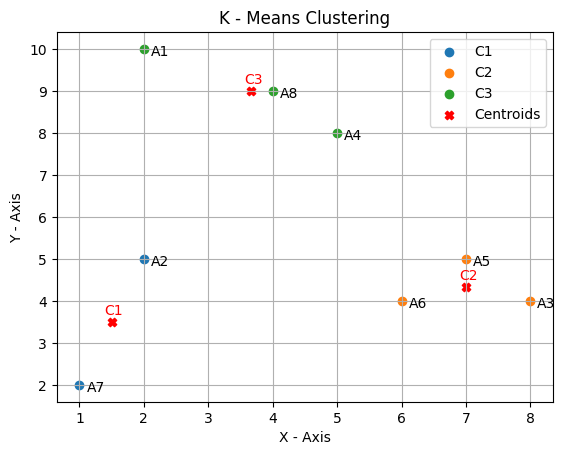

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

k = 3

index = [f"A{i}" for i in range(1, 9)]

data = pd.DataFrame({
    "x": [2, 2, 8, 5, 7, 6, 1, 4],
    "y": [10, 5, 4, 8, 5, 4, 2, 9]
}, index = index)

clusters = data.sample(n=k, random_state=42)
clusters.index = [f"C{i}" for i in range(1, k + 1)]

while True:
    distance = pd.DataFrame(index=data.index, columns=clusters.index, dtype=float)
    
    for i in data.index:
        for j in clusters.index:
            distance.loc[i, j] = math.sqrt(np.sum((data.loc[i] - clusters.loc[j]) ** 2))
    
    assignments = distance.idxmin(axis=1)
    newClusters = pd.DataFrame(index=clusters.index, columns=["x", "y"])
    
    for cluster in clusters.index:
        assignedPoints = data[assignments == cluster]
        if not assignedPoints.empty:
            newClusters.loc[cluster] = assignedPoints.mean()
    
    if newClusters.equals(clusters):
        break
    
    clusters = newClusters
print(f"Final Cluster:\n{clusters}")
print(f"\nFinal assignments:\n{assignments}")


for cluster in clusters.index:
    assignedPoints = data[assignments == cluster]
    if not assignedPoints.empty:
        plt.scatter(assignedPoints["x"], 
                    assignedPoints["y"], 
                    label=cluster
        )

        for i in assignedPoints.index:
            plt.annotate(i, (assignedPoints.loc[i, "x"], assignedPoints.loc[i, "y"]), xytext=(5,-5), textcoords="offset points", color="black")

plt.scatter(clusters["x"], clusters["y"], c="r", marker="X", label="Centroids")
for i in clusters.index:
    plt.annotate(i, (clusters.loc[i, "x"], clusters.loc[i, "y"]), xytext=(-5,5), textcoords="offset points", color="red")
    
plt.xlabel("X - Axis")
plt.ylabel("Y - Axis")
plt.title("K - Means Clustering")
plt.legend()
plt.grid(True)
plt.show()

### Using Library

Final Cluster Centers:
           x         y
C1  7.000000  4.333333
C2  3.666667  9.000000
C3  1.500000  3.500000

Final Assignments:
A1    C2
A2    C3
A3    C1
A4    C2
A5    C1
A6    C1
A7    C3
A8    C2
dtype: object


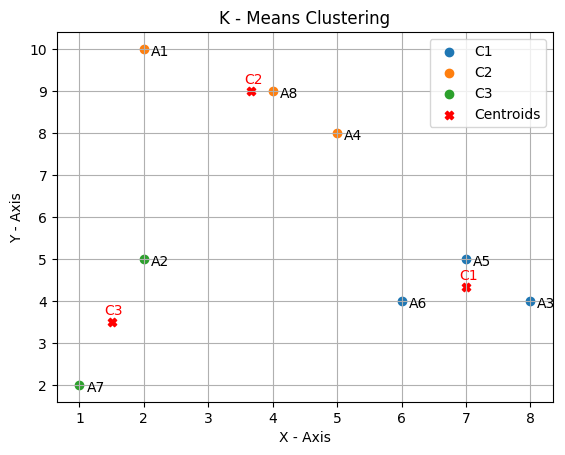

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

index = [f"A{i}" for i in range(1, 9)]
data = pd.DataFrame({
    "x": [2, 2, 8, 5, 7, 6, 1, 4],
    "y": [10, 5, 4, 8, 5, 4, 2, 9]
}, index=index)

k = 3

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(data)

clusters = pd.DataFrame(kmeans.cluster_centers_, columns=["x", "y"])
clusters.index = [f"C{i+1}" for i in range(k)]
assignments = pd.Series(kmeans.labels_, index=data.index).replace({i: f"C{i+1}" for i in range(k)})

print(f"Final Cluster Centers:\n{clusters}")
print(f"\nFinal Assignments:\n{assignments}")

for cluster in clusters.index:
    assigned_points = data[assignments == cluster]
    plt.scatter(assigned_points["x"], assigned_points["y"], label=cluster)

    for i in assigned_points.index:
        plt.annotate(i, (assigned_points.loc[i, "x"], assigned_points.loc[i, "y"]), xytext=(5, -5), textcoords="offset points", color="black")

plt.scatter(clusters["x"], clusters["y"], c="r", marker="X", label="Centroids")
for i in clusters.index:
    plt.annotate(i, (clusters.loc[i, "x"], clusters.loc[i, "y"]), xytext=(-5, 5), textcoords="offset points", color="red")

plt.xlabel("X - Axis")
plt.ylabel("Y - Axis")
plt.title("K - Means Clustering")
plt.legend()
plt.grid(True)
plt.show()